In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [ ]:
path = "/Users/user1/Downloads/crop_part1/subset/"
inputPath = "/Users/user1/Downloads/crop_part1/subset/input/" 
testPath = "/Users/user1/Downloads/crop_part1/subset/input/Test"

age_cat_bb_path = "/Users/user1/Downloads/Generations/BabyBoom_54_72"
age_cat_gx_path = "/Users/user1/Downloads/Generations/GenX_38_53"
age_cat_ml_path = "/Users/user1/Downloads/Generations/Millenials_22_37"
age_cat_sl_path = "/Users/user1/Downloads/Generations/Silent_73_90"


test_images_path = "/Users/user1/Downloads/Generations/TEST"

In [ ]:
train_set_size = 100
age_categories = ['Millenials','Gen X','Baby Boomer','Silent']
age_cat_paths = [age_cat_ml_path,age_cat_gx_path,age_cat_bb_path,age_cat_sl_path]

## Classification Using Mean Image

In [238]:
#read all images at aa given path into an array
def readImagesIntoArray(path):
    images = []
    print("Reading .jpg or .jpeg Images from: ",path)
    for filePath in sorted(os.listdir(path)):
        fileExt = os.path.splitext(filePath)[1]
        if fileExt in [".jpg", ".jpeg"]:
            imagePath = os.path.join(path, filePath)
            im = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
            im = np.float32(im)/255.0
            images.append(im[40:160,40:160])
            imFlip = cv2.flip(im, 1);
            # Append flipped image
            images.append(imFlip[40:160,40:160])
    print("Read ",len(images)," images")
    return(images)

#readImagesIntoArray(inputPath)
    
#plot at max 10 images from the data set
def showImages(images):
    maxNumOfImagesToShow = 10
    numImages = min(maxNumOfImagesToShow,len(images))
    #print("Showing first ",numImages," images only.")
    if len(images)==1:
            fig1 = plt.figure(figsize = (5,5))
            ax3 = fig1.add_subplot(111)
            ax3.imshow(images[0],cmap='gray')
            return
    f, axarr = plt.subplots(1,numImages,figsize=(10,10))
    images = images[:numImages]
    for i,image in enumerate(images):
            axarr[i].axis('off')
            axarr[i].imshow(image,cmap='gray')

#images = readImagesIntoArray(inputPath)
#showImages(images)

#Flatten image and create data matrix of all images
def createImageDataMatrix(images):
    numImages = len(images)
    sz = images[0].shape
    data = np.zeros((numImages, 120 * 120),dtype=np.float32)
    for i in range(0,numImages):
        image = images[i].flatten()
        data[i,:] = image
        data[i].reshape(14400,1)
    return data

#showImages([createImageDataMatrix(images)[0].reshape(200,200)])

def calculateMeanImage(dataMatrix):
    meanImageDataMatrix = np.mean(dataMatrix,axis =0)
    return meanImageDataMatrix

#Calculate L2 distance
def calculateL2Distance(vector1,vector2):
    diff = vector1 - vector2
    l2_norm = np.sqrt(np.sum(diff**2))
    return l2_norm

#find min index in array
def findMinIndex(array):
    return array.index(min(array))

#Get Category from Age
def getCategoryFromAge(age):
    age = int(age)
    if age >= 54 and age <=72:
        return('Baby Boomer')
    if age >= 38 and age <=53:
        return('Gen X')
    if age >= 22 and age <=37:
        return('Millenials')
    if age >= 73 and age <=90:
        return('Silent')
    return('Category Undefined')

In [61]:
images[i][25:175,25:175].shape

(150, 150)

In [239]:
#Read in all images
age_cat_images = []
for path in age_cat_paths:
    images = readImagesIntoArray(path)
    age_cat_images.append(images)

Reading .jpg or .jpeg Images from:  /Users/user1/Downloads/Generations/Millenials_22_37
Read  4170  images
Reading .jpg or .jpeg Images from:  /Users/user1/Downloads/Generations/GenX_38_53
Read  2670  images
Reading .jpg or .jpeg Images from:  /Users/user1/Downloads/Generations/BabyBoom_54_72
Read  20  images
Reading .jpg or .jpeg Images from:  /Users/user1/Downloads/Generations/Silent_73_90
Read  1216  images


In [240]:
#Create Data Matrix for all images
age_cat_data_matrix = []
for images in age_cat_images:
    dataMatrixForAllImages = createImageDataMatrix(images)
    age_cat_data_matrix.append(dataMatrixForAllImages)

In [223]:
age_cat_data_matrix[0].shape

(2085, 14400)

In [241]:
#Calculate Mean Image for each category
age_cat_mean_images = []
for data in age_cat_data_matrix:
    meanImage = calculateMeanImage(data)
    age_cat_mean_images.append(meanImage)

Millenials
Gen X
Baby Boomer
Silent


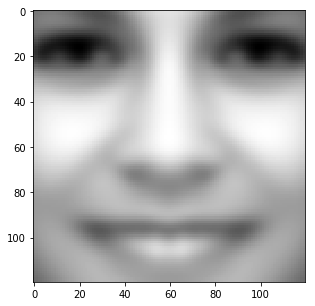

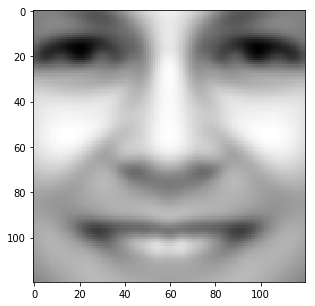

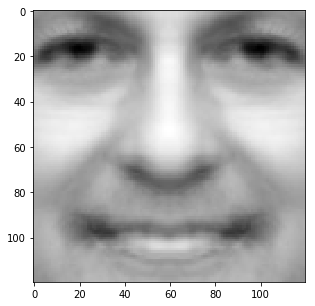

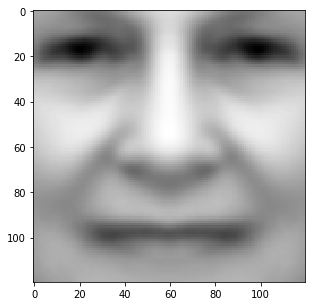

In [242]:
#Show all mean Images
for i, meanImageData in  enumerate(age_cat_mean_images):
    reshapedImage = meanImageData.reshape(120,120)
    print(age_categories[i])
    showImages([reshapedImage])

Millenials
Gen X
Baby Boomer
Silent


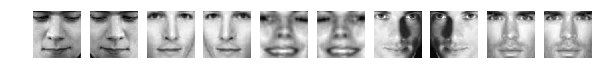

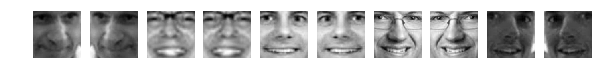

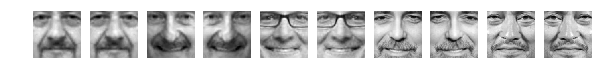

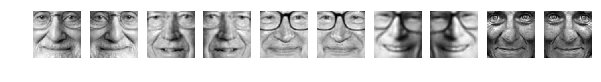

In [243]:
#Show all categories images (sample)
for i, images in enumerate(age_cat_images):
    print(age_categories[i])
    showImages(images)

Reading .jpg or .jpeg Images from:  /Users/raghavatal/Downloads/Generations/TEST
Read  40  images


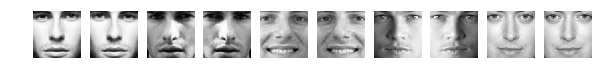

In [256]:
#Read Test Images
#Read in all images
testFilePath = sorted(os.listdir(test_images_path))
test_images = readImagesIntoArray(test_images_path)
test_images_actual_age = []
for imageName in testFilePath:
    test_images_actual_age.append(imageName.split('_')[0])
    test_images_actual_age.append(imageName.split('_')[0])
test_images_data_matrix = createImageDataMatrix(test_images)
showImages(test_images)

In [257]:
#Matcher and Predictor with Mean Images
correctlyPredictedCount = 0
incorrectlyPredictedCount = 0
verbose = False
for i,testImageData in enumerate(test_images_data_matrix):
    #Compare with each mean - calculate L2 distance
    actualCategory = getCategoryFromAge(test_images_actual_age[i])
    if verbose:
        print("Test Image: ",i+1," Actual Category: ",actualCategory)
    l2_distances = []
    for j,meanImageData in enumerate(age_cat_mean_images):
        l2_distance = calculateL2Distance(testImageData,meanImageData)
        l2_distances.append(l2_distance)
    
    predictedCategory = age_categories[findMinIndex(l2_distances)]
    if verbose:
        print("Euclidean Distance from each category Mean")
        print(age_categories)
        print(l2_distances)
        print("Predicted Category: ",predictedCategory)
    if actualCategory == predictedCategory:
        correctlyPredictedCount += 1
        if verbose:
            print("True Prediction")
    else:
        incorrectlyPredictedCount += 1
        if verbose:
            print("False Prediction")
    if verbose:
        print("\n")

totalPrediction = correctlyPredictedCount + incorrectlyPredictedCount
predictionAccuracyPercentage = (correctlyPredictedCount/totalPrediction)*100
print("Prediction Accuracy based on Mean Images: ",int(predictionAccuracyPercentage),"%")

Prediction Accuracy based on Mean Images:  55 %


## SVD

In [259]:
def calculateSVD(dataMatrix):
    X = dataMatrix
    U,S,V = np.linalg.svd(X, full_matrices=False)
    return((U,S,V))

#Get Numbers of eigen Vectors that capture 80% Variance
def getNumOfEigenVectorsThatCaptureGivenVariance(varianceThreshold,S):
    variance_explained = (S ** 2)/np.sum(S **2)
    numVector = 1
    for i in range(0,len(S)):    
        var_explained = np.sum(variance_explained[:i]) * 100
        #print(var_explained)
        if var_explained >varianceThreshold:
            return i
    return numVector

    
def getReconstructedDataMatrixBasedOnOptimumEV(numEigenVectors,U,S,V):
    U_reconstructed = U[:,:numEigenVectors]
    S_reconstructed = np.diag(S[:numEigenVectors])
    V_reconstructed = V[:numEigenVectors,:]
    newData = U_reconstructed.dot(S_reconstructed).dot(V_reconstructed)
    return newData

def getUncenteredDataMatrix(data,originalData):
    uncenteredData = data #+ np.mean(originalData,axis=0)
    return uncenteredData

In [248]:
#Create SVD matrices for all categories
age_cat_svd = [] #containes (U,S,V) tuple returned from SVD computation
for i,dataMatrix in enumerate(age_cat_data_matrix):
    dataMatrix = dataMatrix - np.mean(dataMatrix,axis=0)
    print('Computing Singular Value Decomposition for ',age_categories[i],' age category')
    age_cat_svd.append(calculateSVD(dataMatrix))

Computing Singular Value Decomposition for  Millenials  age category
Computing Singular Value Decomposition for  Gen X  age category
Computing Singular Value Decomposition for  Baby Boomer  age category
Computing Singular Value Decomposition for  Silent  age category


In [249]:
#Get Max eigen vectors that explain 80% variance for each category
age_cat_num_prominent_ev = []
for i,svd in enumerate(age_cat_svd):
    threshold = 85
    print('Getting Num eigen vectors that explain',threshold,'variance for',age_categories[i],'age category')
    num_ev = getNumOfEigenVectorsThatCaptureGivenVariance(threshold,svd[1])
    age_cat_num_prominent_ev.append(num_ev)

print(age_categories)
print(age_cat_num_prominent_ev)

Getting Num eigen vectors that explain 85 variance for Millenials age category
Getting Num eigen vectors that explain 85 variance for Gen X age category
Getting Num eigen vectors that explain 85 variance for Baby Boomer age category
Getting Num eigen vectors that explain 85 variance for Silent age category
['Millenials', 'Gen X', 'Baby Boomer', 'Silent']
[22, 24, 8, 39]


In [250]:
print(age_cat_svd[0][0].shape) #U
print(age_cat_svd[0][1].shape) #S
print(age_cat_svd[0][2].shape) #V.T

(4170, 4170)
(4170,)
(4170, 14400)


In [260]:
#Get Reconstructed Data Matrix for all categories
age_cat_recons_data_matrix = []
for i,svd in enumerate(age_cat_svd):
    recon_dataMat = getReconstructedDataMatrixBasedOnOptimumEV(age_cat_num_prominent_ev[i],svd[0],svd[1],svd[2])
    age_cat_recons_data_matrix.append(recon_dataMat)

In [261]:
#Get uncetered Data for all categories
age_cat_uncentered_data_matrix = []
for i,recon_dataMatrix in enumerate(age_cat_recons_data_matrix):
    #uncenteredData = np.mean(age_cat_recons_data_matrix[i],axis=0) + np.mean(age_cat_data_matrix[i],axis=0)
    uncenteredData = getUncenteredDataMatrix(recon_dataMatrix,age_cat_data_matrix[i])
    age_cat_uncentered_data_matrix.append(uncenteredData)

In [262]:
#Get mean for all reconstructed images
recon_mean_image_svd = []
for i , data in enumerate(age_cat_uncentered_data_matrix):
    print('Calculating reconstructed mean for',age_categories[i],'age category')
    reconMean = calculateMeanImage(data)
    recon_mean_image_svd.append(reconMean)

Calculating reconstructed mean for Millenials age category
Calculating reconstructed mean for Gen X age category
Calculating reconstructed mean for Baby Boomer age category
Calculating reconstructed mean for Silent age category


In [142]:
len(recon_mean_image_svd)

4

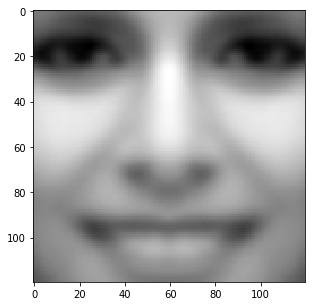

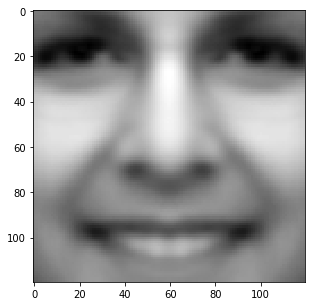

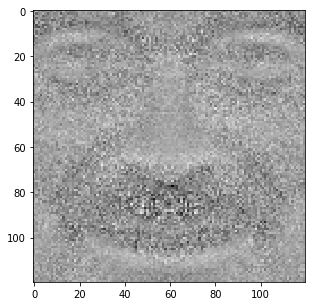

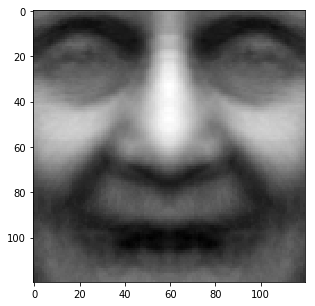

In [263]:
for meanImage in recon_mean_image_svd:
    showImages([meanImage.reshape(120,120)])

In [258]:
#Matcher and Predictor with SVD Mean Images
correctlyPredictedCount = 0
incorrectlyPredictedCount = 0
verbose = True
for i,testImageData in enumerate(test_images_data_matrix):
    #Compare with each mean - calculate L2 distance
    actualCategory = getCategoryFromAge(test_images_actual_age[i])
    if verbose:
        print("Test Image: ",i+1," Actual Category: ",actualCategory)
    l2_distances = []
    for j,meanImageData in enumerate(recon_mean_image_svd):
        
        l2_distance = calculateL2Distance(testImageData,meanImageData)
        l2_distances.append(l2_distance)
    
    predictedCategory = age_categories[findMinIndex(l2_distances)]
    if verbose:
        print("Euclidean Distance from each category Mean")
        print(age_categories)
        print(l2_distances)
        print("Predicted Category: ",predictedCategory)
    if actualCategory == predictedCategory:
        correctlyPredictedCount += 1
        if verbose:
            print("True Prediction")
    else:
        incorrectlyPredictedCount += 1
        if verbose:
            print("False Prediction")
    if verbose:
        print("\n")

totalPrediction = correctlyPredictedCount + incorrectlyPredictedCount
predictionAccuracyPercentage = (correctlyPredictedCount/totalPrediction)*100
print("Prediction Accuracy based on SVD Reconstructed Images: ",int(predictionAccuracyPercentage),"%")

Test Image:  1  Actual Category:  Millenials
Euclidean Distance from each category Mean
['Millenials', 'Gen X', 'Baby Boomer', 'Silent']
[26.553406, 28.441355, 27.706764, 29.15149]
Predicted Category:  Millenials
True Prediction


Test Image:  2  Actual Category:  Millenials
Euclidean Distance from each category Mean
['Millenials', 'Gen X', 'Baby Boomer', 'Silent']
[26.553406, 28.441355, 27.706764, 29.151491]
Predicted Category:  Millenials
True Prediction


Test Image:  3  Actual Category:  Millenials
Euclidean Distance from each category Mean
['Millenials', 'Gen X', 'Baby Boomer', 'Silent']
[22.505148, 23.54305, 23.608305, 23.296618]
Predicted Category:  Millenials
True Prediction


Test Image:  4  Actual Category:  Millenials
Euclidean Distance from each category Mean
['Millenials', 'Gen X', 'Baby Boomer', 'Silent']
[22.505146, 23.54305, 23.608305, 23.29662]
Predicted Category:  Millenials
True Prediction


Test Image:  5  Actual Category:  Millenials
Euclidean Distance from each ca